**Thành Viên Nhóm:**
* LÊ THỊ TUYẾT NHUNG
* HUỲNH VĂN TRINH
* BẠCH NGỌC MINH TRUC
* MAI HẠ VY

# **Import Thư Viện**

In [67]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import re
%matplotlib inline

!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer

!pip install wordcloud
from wordcloud import WordCloud

!pip install tweet-preprocessor
import preprocessor as p

from gensim.models import KeyedVectors

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Kiểm Tra Dữ Liệu**

In [10]:
## Đọc tập tin vào dataframe
from google.colab import drive
drive.mount("/content/gdrive")

dataset = pd.read_csv('/content/gdrive/My Drive/Xử Lý Ngôn Ngữ Tự Nhiên/training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1")
dataset.columns = ["label", "time", "date", "query", "username", "text"]
dataset.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [11]:
dataset.tail()

,label,time,date,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


**Data information**

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


**Rows and columns in the dataset**

In [13]:
print('Count of columns in the data is:  ', len(dataset.columns))

Count of columns in the data is:   6


In [14]:
print('Count of rows in the data is:  ', len(dataset))

Count of rows in the data is:   1599999


**Selecting the text and label coloumn**

In [15]:
data=dataset[['text','label']]
data

,text,label
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,4
1599995,TheWDB.com - Very cool to hear old Walt interv...,4
1599996,Are you ready for your MoJo Makeover? Ask me f...,4
1599997,Happy 38th Birthday to my boo of alll time!!! ...,4


In [16]:
data['label'].unique()

array([0, 4])

**Assigning 1 to Positive sentment 4**

In [17]:
data['label'][data['label']==4]=1

<ipython-input-17-f0fba5e9ddfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][data['label']==4]=1
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
data['label'].unique()

array([0, 1])

# **Tiền Xử Lý Dữ Liệu** 

**Separating positive and negative tweets**

In [19]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

In [20]:
data_pos.head()

,text,label
799999,I LOVE @Health4UandPets u guys r the best!!,1
800000,im meeting up with one of my besties tonight! ...,1
800001,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800002,Being sick can be really cheap when it hurts t...,1
800003,@LovesBrooklyn2 he has that effect on everyone,1


In [21]:
data_neg.head()

,text,label
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


**taking one fourth data so we can run on our machine easily**

In [22]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

**Combining positive and negative tweets**

In [23]:
data = pd.concat([data_pos, data_neg])
data

,text,label
799999,I LOVE @Health4UandPets u guys r the best!!,1
800000,im meeting up with one of my besties tonight! ...,1
800001,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800002,Being sick can be really cheap when it hurts t...,1
800003,@LovesBrooklyn2 he has that effect on everyone,1
...,...,...
19995,One more day of holidays,0
19996,feeling so down right now .. i hate you DAMN H...,0
19997,"geez,i hv to READ the whole book of personalit...",0
19998,I threw my sign at donnie and he bent over to ...,0


**Making statement text in lower case**

In [24]:
data['text']=data['text'].str.lower()
data

,text,label
799999,i love @health4uandpets u guys r the best!!,1
800000,im meeting up with one of my besties tonight! ...,1
800001,"@darealsunisakim thanks for the twitter add, s...",1
800002,being sick can be really cheap when it hurts t...,1
800003,@lovesbrooklyn2 he has that effect on everyone,1
...,...,...
19995,one more day of holidays,0
19996,feeling so down right now .. i hate you damn h...,0
19997,"geez,i hv to read the whole book of personalit...",0
19998,i threw my sign at donnie and he bent over to ...,0


**Cleaning and removing Stop words of english**

In [25]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

**Cleaning and removing the above stop words list from the tweet text**

In [27]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

**Cleaning and removing punctuations**

In [28]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [29]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text']

799999                   love health4uandpets u guys r best
800000    im meeting one besties tonight cant wait  girl...
800001    darealsunisakim thanks twitter add sunisa got ...
800002    sick really cheap hurts much eat real food plu...
800003                       lovesbrooklyn2 effect everyone
                                ...                        
19995                                      one day holidays
19996                      feeling right  hate damn humprey
19997     geezi hv read whole book personality types emb...
19998      threw sign donnie bent get thingee made sad face
19999     heather2711 good thing find none ones like com...
Name: text, Length: 40000, dtype: object

**Cleaning and removing repeating characters**

In [30]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [31]:
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text']

799999                   love health4uandpets u guys r best
800000    im meting one besties tonight cant wait girl talk
800001    darealsunisakim thanks twiter ad sunisa got me...
800002    sick realy cheap hurts much eat real fod plus ...
800003                         lovesbroklyn2 efect everyone
                                ...                        
19995                                      one day holidays
19996                        feling right hate damn humprey
19997     gezi hv read whole bok personality types embar...
19998        threw sign donie bent get thinge made sad face
19999     heather271 god thing find none ones like come ...
Name: text, Length: 40000, dtype: object

**Cleaning and removing email**

In [32]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [33]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data

,text,label
799999,love health4uandpets u guys r best,1
800000,im meting one besties tonight cant wait girl talk,1
800001,darealsunisakim thanks twiter ad sunisa got me...,1
800002,sick realy cheap hurts much eat real fod plus ...,1
800003,lovesbroklyn2 efect everyone,1
...,...,...
19995,one day holidays,0
19996,feling right hate damn humprey,0
19997,gezi hv read whole bok personality types embar...,0
19998,threw sign donie bent get thinge made sad face,0


**Cleaning and removing URL's**

In [34]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [35]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data

,text,label
799999,love health4uandpets u guys r best,1
800000,im meting one besties tonight cant wait girl talk,1
800001,darealsunisakim thanks twiter ad sunisa got me...,1
800002,sick realy cheap hurts much eat real fod plus ...,1
800003,lovesbroklyn2 efect everyone,1
...,...,...
19995,one day holidays,0
19996,feling right hate damn humprey,0
19997,gezi hv read whole bok personality types embar...,0
19998,threw sign donie bent get thinge made sad face,0


**Cleaning and removing Numeric**

In [36]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [37]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data

,text,label
799999,love healthuandpets u guys r best,1
800000,im meting one besties tonight cant wait girl talk,1
800001,darealsunisakim thanks twiter ad sunisa got me...,1
800002,sick realy cheap hurts much eat real fod plus ...,1
800003,lovesbroklyn efect everyone,1
...,...,...
19995,one day holidays,0
19996,feling right hate damn humprey,0
19997,gezi hv read whole bok personality types embar...,0
19998,threw sign donie bent get thinge made sad face,0


**Getting tokenization of tweet text**

In [38]:
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [39]:
data

,text,label
799999,"[love, healthuandpets, u, guys, r, best]",1
800000,"[im, meting, one, besties, tonight, cant, wait...",1
800001,"[darealsunisakim, thanks, twiter, ad, sunisa, ...",1
800002,"[sick, realy, cheap, hurts, much, eat, real, f...",1
800003,"[lovesbroklyn, efect, everyone]",1
...,...,...
19995,"[one, day, holidays]",0
19996,"[feling, right, hate, damn, humprey]",0
19997,"[gezi, hv, read, whole, bok, personality, type...",0
19998,"[threw, sign, donie, bent, get, thinge, made, ...",0


**Applying Stemming**

In [40]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data

,text,label
799999,"[love, healthuandpets, u, guys, r, best]",1
800000,"[im, meting, one, besties, tonight, cant, wait...",1
800001,"[darealsunisakim, thanks, twiter, ad, sunisa, ...",1
800002,"[sick, realy, cheap, hurts, much, eat, real, f...",1
800003,"[lovesbroklyn, efect, everyone]",1
...,...,...
19995,"[one, day, holidays]",0
19996,"[feling, right, hate, damn, humprey]",0
19997,"[gezi, hv, read, whole, bok, personality, type...",0
19998,"[threw, sign, donie, bent, get, thinge, made, ...",0


**Applying Lemmatizer**

In [41]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))
data

,text,label
799999,"[love, healthuandpets, u, guys, r, best]",1
800000,"[im, meting, one, besties, tonight, cant, wait...",1
800001,"[darealsunisakim, thanks, twiter, ad, sunisa, ...",1
800002,"[sick, realy, cheap, hurts, much, eat, real, f...",1
800003,"[lovesbroklyn, efect, everyone]",1
...,...,...
19995,"[one, day, holidays]",0
19996,"[feling, right, hate, damn, humprey]",0
19997,"[gezi, hv, read, whole, bok, personality, type...",0
19998,"[threw, sign, donie, bent, get, thinge, made, ...",0


# **Naive Bayes**

In [61]:
X=data.text
y=data.label

**Preparing the input features for training**

In [62]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [63]:
sequences_matrix

array([[   0,    0,    0, ...,  138,  297,  100],
       [   0,    0,    0, ...,   75,  200,  240],
       [   0,    0,    0, ...,  114, 1789, 1081],
       ...,
       [   0,    0,    0, ...,  359,   51,  394],
       [   0,    0,    0, ...,  121,   56,  408],
       [   0,    0,    0, ...,  315,  169,  794]], dtype=int32)

**Separating the 80% data for training data and 20% for testing data**

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.2, random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
model_NB.fit(X_train, Y_train)

GaussianNB()

In [47]:
Multinomial_nb_score = model_NB.score(X_train, Y_train)
Multinomial_nb_score

0.51646875

In [66]:
from nltk.tag.api import accuracy
yHat = model_NB.predict(X_test)
print(f'Độ chính xác = {accuracy_score(Y_test,yHat)}')

Độ chính xác = 0.51725


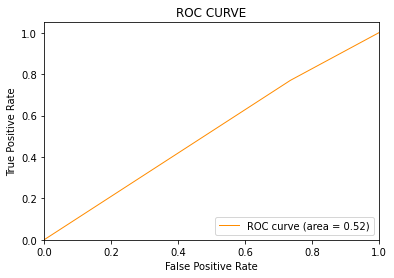

In [49]:
fpr, tpr, thresholds = roc_curve(Y_test, yHat)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **k-NN**

In [50]:
import imageio
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import pydotplus         as pdp
import scipy.stats       as st
import seaborn           as sbn
import warnings
warnings.filterwarnings('ignore')

from IPython.display         import Image
from sklearn                 import linear_model, svm, tree
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes     import BernoulliNB, GaussianNB
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier

In [51]:
k = 7
model_kNN = KNeighborsClassifier(n_neighbors=k)
model_kNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=7)

In [52]:
yHat = model_kNN.predict(X_test)
print(f'Độ chính xác = {accuracy_score(Y_test, yHat) * 100:.2f}%')

Độ chính xác = 52.56%


In [53]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [54]:
prediction = text_classifier.predict(X_test)
prediction

array([0, 0, 1, ..., 1, 0, 0])

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(Y_test,prediction))
print(classification_report(Y_test,prediction))
print(accuracy_score(Y_test,prediction))

[[2475 1523]
 [1819 2183]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      3998
           1       0.59      0.55      0.57      4002

    accuracy                           0.58      8000
   macro avg       0.58      0.58      0.58      8000
weighted avg       0.58      0.58      0.58      8000

0.58225


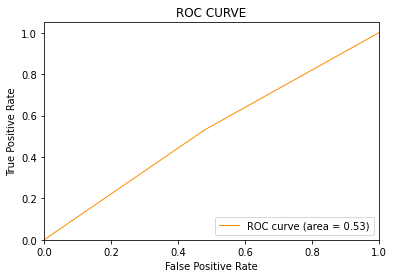

In [56]:
fpr, tpr, thresholds = roc_curve(Y_test, yHat)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()